<img src="img/graph_3_ex1.png" align="right" width=320>
# Graphical Analysis

Pyevolve comes with a Graphical Plotting Tool, based on the [Matplotlib plotting library](http://matplotlib.org/).

To use this graphical plotting tool, you need to use the [DBAdapters.DBSQLite](http://pyevolve.sourceforge.net/0_6rc1/module_dbadapters.html) adapter and create the database file. Pyevolve have the "identify” concept, the value of this parameter means the same value used in the "identify” parameter of the DB Adapter.

We are going to extend the first example with the database and graphical output.

In [1]:
from pyevolve import G1DList, GSimpleGA
from pyevolve import DBAdapters

In [3]:
def eval_func(chromosome):
    score = 0.0
    for value in chromosome:
        if value==0:
            score += 1.0
    return score

In [4]:
genome = G1DList.G1DList(20)
genome.evaluator.set(eval_func)
genome.setParams(rangemin=0, rangemax=10)

The database adapter is defined in the following cell. The parameter <tt>resetDB</tt> is set for deleting any existing data in the database.

In [25]:
sqlite_adapter = DBAdapters.DBSQLite(dbname='first_example.db', identify="ex1", resetDB=True)

When you run your GA, all the statistics will be dumped to this database, and you have an ID for this run, which is the identify parameter. So when you use the graph tool, it will read the statistics from this database file.

Let's evolve the example. Now we will set a number of generation for completing the evolution with a single call to <tt>ga.evolve</tt>.

In [26]:
ga = GSimpleGA.GSimpleGA(genome)
ga.setDBAdapter(sqlite_adapter)
ga.setGenerations(20)
ga.evolve(freq_stats=5)
print("Generation: %d" % ga.currentGeneration)
best = ga.bestIndividual()
print('\tBest individual: %s' % str(best.genomeList))
print('\tBest score: %.0f' % best.score)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [2.33(5.00)/1.69(0.00)/1.94(1.94)]
Gen. 5 (25.00%): Max/Min/Avg Fitness(Raw) [9.60(9.00)/6.40(7.00)/8.00(8.00)]
Gen. 10 (50.00%): Max/Min/Avg Fitness(Raw) [14.40(13.00)/9.60(11.00)/12.00(12.00)]
Gen. 15 (75.00%): Max/Min/Avg Fitness(Raw) [19.20(18.00)/12.80(14.00)/16.00(16.00)]
Gen. 20 (100.00%): Max/Min/Avg Fitness(Raw) [22.80(20.00)/15.20(18.00)/19.00(19.00)]
Total time elapsed: 0.662 seconds.
Generation: 20
	Best individual: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	Best score: 20


## Plotting

Here are described the main graph types.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pyevolve_plot import plot_errorbars_raw, plot_errorbars_fitness, \
                          plot_maxmin_raw, plot_maxmin_fitness, \
                          plot_diff_raw, plot_pop_heatmap_raw

### Error bars graph (raw scores)

In this graph, you will find the generations on the x-axis and the raw scores on the y-axis. The green vertical bars represents the maximum and the minimum raw scores of the current population at generation indicated in the x-axis. The blue line between them is the average raw score of the population.

Loading database...
20 generations found !


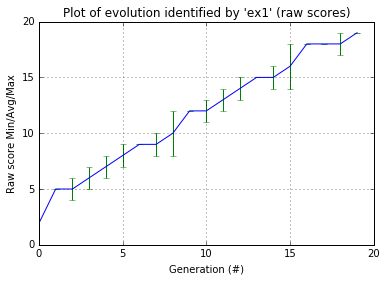

In [3]:
plot_errorbars_raw('first_example.db','ex1')

### Error bars graph (fitness scores)

The differente between this graph option and the previous one is that we are using the fitness scores instead of the raw scores.

Loading database...
20 generations found !


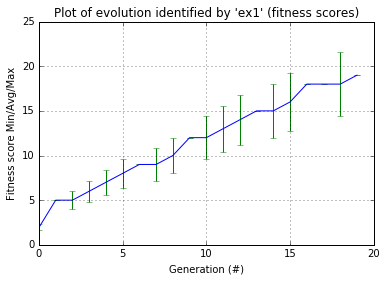

In [4]:
plot_errorbars_fitness('first_example.db','ex1')

### Max/min/avg/std. dev. graph (raw scores)

In this graph we have the green line showing the maximum raw score at the generation in the x-axis, the red line shows the minimum raw score, and the blue line shows the average raw scores. The green shaded region represents the difference between our max. and min. raw scores. The black line shows the standard deviation of the average raw scores. We also have some annotations like the maximum raw score, maximum std. dev. and the min std. dev.

Loading database...
20 generations found !


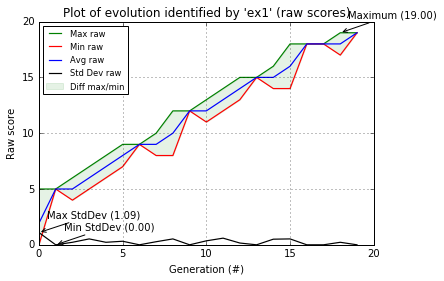

In [5]:
plot_maxmin_raw('first_example.db','ex1')

### Max/min/avg/std. dev. graph (fitness  scores)

This graphs shows the maximum fitness score from the population at the x-axis generation using the green line. The red line shows the minimum fitness score and the blue line shows the average fitness score from the population. The green shaded region between the green and red line shows the difference between the best and worst individual of population.

Loading database...
20 generations found !


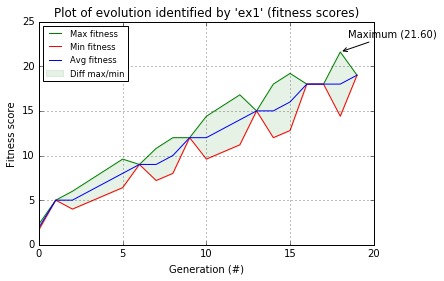

In [6]:
plot_maxmin_fitness('first_example.db','ex1')

### Min/max difference graph, raw and fitness scores

In this graph, we have two subplots, the first is the difference between the best individual raw score and the worst individual raw score. The second graph shows the difference between the best individual fitness score and the worst individual fitness score Both subplost shows the generation on the x-axis and the score difference in the y-axis.

Loading database...
20 generations found !


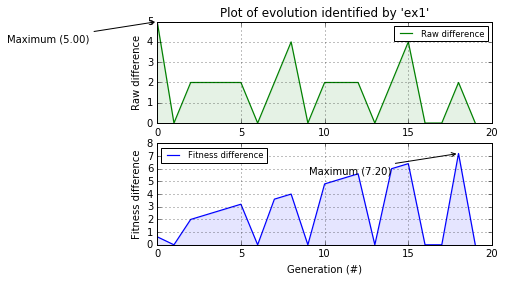

In [2]:
plot_diff_raw('first_example.db','ex1')

### Heat map of population raw score distribution

The heat map graph is a plot with the population individual plotted as the x-axis and the generation plotted in the y-axis. On the right side we have a legend with the color/score relation. As you can see, on the initial populations, the last individals scores are the worst (represented in this colormap with the dark blue). To create this graph, we use the Gaussian interpolation method.

Loading database...
20 generations found !


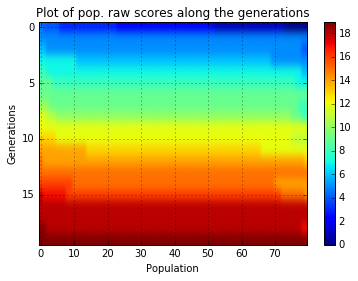

In [2]:
plot_pop_heatmap_raw('first_example.db','ex1')

### Heat map of population raw score distribution

The heat map graph is a plot with the population individual plotted as the x-axis and the generation plotted in the y-axis. On the right side we have a legend with the color/score relation. As you can see, on the initial populations, the last individals scores are the worst (represented in this colormap with the dark blue). To create this graph, we use the Gaussian interpolation method.